# Monolayer WSe$_2$

In [14]:
from moire.lattice import Lattice
import ipywidgets as widgets
import numpy as np
from myst_nb import glue

## Lattice

We base our tight binding model of monolayer WSe$_2$ (mWSe$_2$) on the three band model by Liu et al. {cite}`three_band`. In this model of mWSe2 we consider only the tungsten sites, which form a triangular lattice in the $xy$ plane:

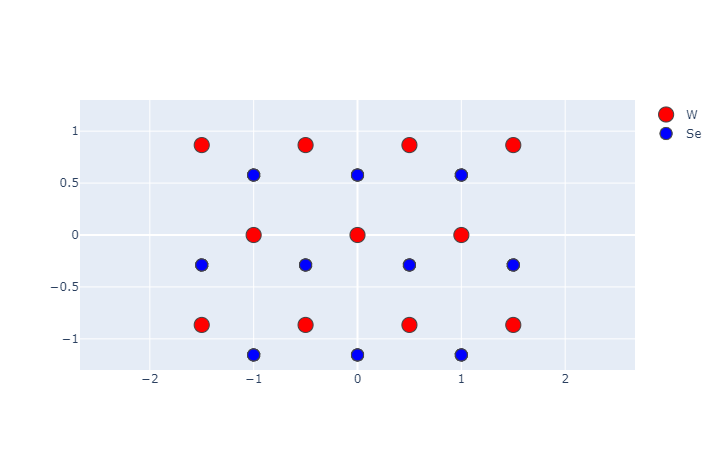

In [11]:


W_dic = dict(name='W', color='red', draw_radius=50, key= 'W')
Se_dic = dict(name='Se', color='blue', draw_radius=40, key='Se')

wse2_lat = Lattice(3.325)
wse2_lat.set_atom([0, 0], W_dic)
wse2_lat.set_atom([0, 1.919689645, 1.67871166], Se_dic)
wse2_lat.set_atom([0, 1.919689645, -1.67871166], Se_dic)

wse2_lat.plot(4, 2.6, plot_3d=False, all=dict(showlegend=True)).show()

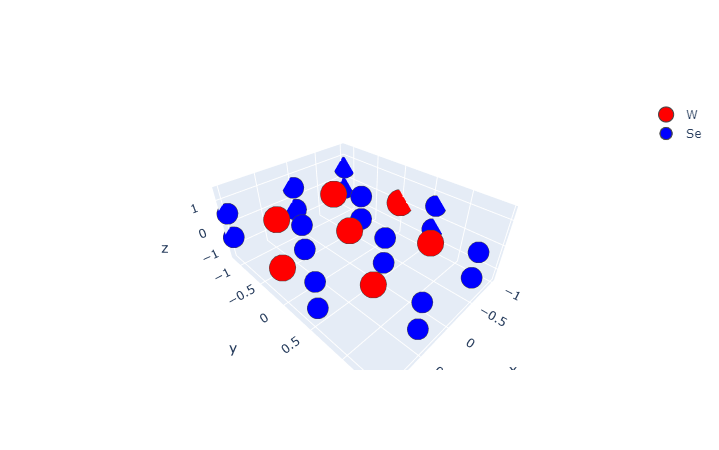

In [12]:
wse2_lat.plot(3, 3, plot_3d=True, all=dict(showlegend=True)).show()

with real space unit vectors:

$$
\vec a_1=\begin{pmatrix}1\\ 0\end{pmatrix}\text{ and } \vec a_2=\frac12\begin{pmatrix}1\\ \sqrt{3}\end{pmatrix},    
$$

and reciprocal lattice vectors:

$$
\vec b_1=2\pi\begin{pmatrix}1\\ -1/\sqrt{3}\end{pmatrix}\text{ and } \vec b_2=2\pi\begin{pmatrix}0\\ 2/\sqrt{3}\end{pmatrix},    
$$

where length is in units of the lattice spacing $a$ between two tungsten atoms.

## Symmetries

The symmetric point group of this triangular lattice is $D_3$ with generators $\{C_3, \sigma\}$. $C_3$ is a rotation of $2\pi/3$ in the $xy$ plane and $\sigma$ is a reflection with respect to the bisector of $\vec a_1$ and $\vec a_2$. $C_6$ is not a symmetry element of this lattice since this operation exchanges triangles containing Se$_2$ and empty triangles.

We restrict the orbitals of tungsten to the $d$ orbitals $d_{x^2-y^2}$, $d_{xy}$ and $d_{z^2}$, which dictate the low energy $K$ points. The other orbitals are either at a different energy scale or do not mix with these orbitals due to the symmetries of the lattice. The tight binding hopping matrix between these orbitals in the hopping direction $\vec a_1$ writes:

$$
    \mathcal H_0 = \begin{pmatrix}
        t_1&t_{12}&t_{13}\\
        -t_{12}&t_2&t_{23}\\
        t_{13}&-t_{23}&t_3
    \end{pmatrix},
$$

in the basis $(d_{x^2-y^2}\, d_{xy}\,d_{z^2})$.

In [15]:
wse2_var_dic = {
        "t_1": 0.034, 
        "t_2": 0.263, 
        "t_3": -0.207, 
        "t_12": 0.329, 
        "t_13": 0.486, 
        "t_23": 0.457, 
        "ε_1": 2.179, 
        "ε_3": 0.942, 
        "λ_SOC": 0.228
    }
for key, value in wse2_var_dic.items():
    glue("var:"+key, value)

0.034

0.263

-0.207

0.329

0.486

0.457

2.179

0.942

0.228

````{admonition} GGA coupling constants in eV
GGA coupling constants for WSe$_2$ in the hopping direction $\vec{a}_1$, subscripts 1, 2 and 3 refer to the $d_{x^2-y^2}$, $d_{xy}$ and $d_{z^2}$ orbitals respectively. $\varepsilon_i$ are the on-site energies where $\varepsilon_1=\varepsilon_2$ due to symmetry. $\lambda_\text{SOC}$ is the spin orbit coupling. {cite}`three_band`.
```{list-table}
:header-rows: 1
:name: tab:constants
* - $t_1$
  - $t_2$
  - $t_3$
  - $t_{12}$
  - $t_{13}$
  - $t_{23}$
  - $\varepsilon_1$
  - $\varepsilon_3$
  - $\lambda_\text{SOC}$
* - {glue:}`var:t_1`
  - {glue:}`var:t_2`
  - {glue:}`var:t_3`
  - {glue:}`var:t_12`
  - {glue:}`var:t_13`
  - {glue:}`var:t_23`
  - {glue:}`var:ε_1`
  - {glue:}`var:ε_3`
  - {glue:}`var:λ_SOC`
```
where all energies are measured in eV. 
````


Surprisingly, $\mathcal H_0$ is not symmetric. We recognize the lack of $C_6$ symmetry as the source of this irregularity. This is more easily understood when we consider the interaction between orbitals $d_{xy}$ and $d_{z^2}$:

```{glue:figure} fig:d_z2-d_xy
Representation of atomic orbitals $d_{xy}$ and $d_{z^2}$, the colors represent the different signs of the lobes. We see that the $d_{z^2}$ orbital is symmetric under reflection while the $d_{xy}$ are antisymmetric.
```
Mirroring the hopping direction is equivalent to applying a reflection with respect to the $y$-axis. The $d_{xy}$ orbital changes sign under this operation so $t_{32}=-t_{23}$. If this reflection was a symmetry of the lattice we would require $t_{32}=t^*_{23}$, forcing $t_{23}=0$. We can use a similar argument to exclude the $d_{xz}$ and $d_{yz}$ orbitals from our model, since for a monolayer we do have a reflection symmetry with respect to the $xy$ plane.

## Rotating orbitals

In [ ]:
drawing = draw.Drawing(10, 3.5, origin="center")
stroke_width = 0.03
orb = dg.Orbital()
drawing.append(orb.d_z2())
drawing.append(orb.d_xy(translate=(3, 0)))
drawing.append(orb.d_xy(translate=(-3, 0)))
drawing.append(draw.Line(0, -2, 0, 2, stroke='black', stroke_width=stroke_width, stroke_dasharray="0.05,0.05"))
drawing.setRenderSize(700)
glue('fig:d_z2-d_xy', drawing)

In [ ]:
pos_1 = (1.5, 1.5)
pos_2 = (4.5, 1.5+np.sqrt(3))
R = 0.5
stroke_width = 0.03
color = 'black'
drawing = draw.Drawing(7, 5)
orb = dg.Orbital()
drawing.append(orb.d_x2y2(translate=(pos_1[0], -pos_1[1])))
drawing.append(orb.d_x2y2(translate=(pos_2[0], -pos_2[1])))
drawing.append(draw.Line(*pos_1, *pos_2, stroke=color, stroke_width=stroke_width))
drawing.append(draw.Line(*pos_1, pos_2[0], pos_1[1], stroke=color, stroke_width=stroke_width, stroke_dasharray="0.05,0.05"))
drawing.append(draw.Line(pos_2[0], pos_1[1], *pos_2, stroke=color, stroke_width=stroke_width, stroke_dasharray="0.05,0.05"))
drawing.append(draw.Arc(*pos_1, R, 30, 0, cw=True, stroke=color, stroke_width=stroke_width, fill='none'))
drawing.append(draw.Text('θ', R*2/3, pos_1[0]+1.5*R*np.cos(np.pi/12), pos_1[1]+1.5*R*np.sin(np.pi/12), center=0.6, fill=color))
drawing.setRenderSize(500)
glue('fig:rotate_orbital', drawing)

Having figured out the hopping terms for $\pm\vec a_1$, we need also formulate the coupling between orbitals at an angle with respect to the principal axis:

```{glue:figure} fig:rotate_orbital
Two $d_{x^2-y^2}$ orbitals at angle $\theta$ with respect to the principal axis of the orbitals.
```

We can however decompose any misaligned $d$ orbital as a linear sum of all $d$ orbitals aligned with the hopping axis. Since $d_{z^2}$ is symmetric under rotation in the $xy$ plane we can exclude this orbital from our analysis. We assume the existence of some matrix $R(\theta) = R'(\theta)\oplus 1$ which governs rotations in our basis and apply it to the $d_{x^2-y^2}$ orbital:

$$
\begin{align*}
R'(\theta)|{x^2-y^2}\rangle &= |{(x\cos\theta +y\sin\theta )^2-(y\cos\theta -x\sin\theta )^2}\rangle\\
&=|{x^2\cos^2\theta +y^2\sin^2\theta +xy\sin2\theta-y^2\cos^2\theta -x^2\sin^2\theta +xy\sin2\theta}\rangle\\
&=\cos2\theta|x^2-y^2\rangle + \sin2\theta|2xy\rangle,
\end{align*}
$$

which leads us to express $R'(\theta)$ in matrix form as:

$$
R'(\theta)=\begin{pmatrix}\cos2\theta&-\sin2\theta\\ \sin2\theta&\cos2\theta\end{pmatrix}\rightarrow \mathcal R=R'(\pi/3)\oplus 1=\begin{pmatrix}-1/2&-\sqrt{3}/2\\ \sqrt{3}/2&-1/2\end{pmatrix} \oplus 1.
$$ (eq:rotation_matrix)

Powers of $\mathcal R$ now rotate the orbitals towards the respective hopping axes. Next we need also rotate $\mathcal H_0$ to adhere to the lattice symmetries. We use powers of $C_6$ which we express as $\text{Diag}([1, -1, 1])$ in accordance with the arguments of the previous part on lattice symmetry. 

We now give the hopping matrix for each hopping vector in: 

$$A = \{ \vec a_1, \vec a_2, -\vec a_1+\vec a_2, -\vec a_1, -\vec a_2, \vec a_1-\vec a_2 \} ,$$ 

where enumeration starts at zero:

$$
\mathcal H_i = \mathcal R^i C_6^i \mathcal H_0C_6^i \mathcal R^{-i}.
$$

## Hamiltonian

The total hopping Hamiltonian is now the sum of all $\mathcal H_i$ multiplied by the appropriate complex phases:

$$
\mathcal H_\text{hop}(\mathbf k) = \sum_{i=0}^5\mathcal H_i \text e^{i \mathbf k\cdot A_i} =    \begin{pmatrix}
        h_1&h_{12}&h_{13}\\ h_{12}^\dagger&h_2&h_{23}\\
        h_{13}^\dagger&h_{23}^\dagger&h_3
    \end{pmatrix} ,
$$

````{dropdown} with: (click dropdown for justification)

We start by noticing that all rotation matrices share a quite similar form:

```{list-table} The matrix expressions for $\mathcal R^iC_6^i$ excluding the $d_{z^2}$ component which is block diagonal.
:header-rows: 1
:name: tab:rotation-matrices
* - $I_3$
  - $\mathcal RC_6$
  - $\mathcal R^2C_6^2=\mathcal R^2$
  - $\mathcal R^3C_6^3=C_6$
  - $\mathcal R^4C_6^4=\mathcal R$
  - $\mathcal R^5C_6^5=\mathcal R^2C_6$
* - $I_2$
  - $\begin{pmatrix}-1/2&\sqrt{3}/2\\\sqrt{3}/2&1/2 \end{pmatrix}$
  - $\begin{pmatrix}-1/2&\sqrt{3}/2\\-\sqrt{3}/2&-1/2 \end{pmatrix}$
  - $\begin{pmatrix}1&0\\0&-1 \end{pmatrix}$
  - $\begin{pmatrix}-1/2&-\sqrt{3}/2\\\sqrt{3}/2&-1/2 \end{pmatrix}$
  - $\begin{pmatrix}-1/2&-\sqrt{3}/2\\-\sqrt{3}/2&1/2 \end{pmatrix}$ 
```
As such we can express all of them as some variant of:

$$
\mathcal{\tilde R}(\alpha, \alpha', \beta, \beta')=\begin{pmatrix}\alpha&\beta&0\\\beta'&\alpha'&0\\0&0&1\end{pmatrix}
$$

where $\alpha^2=\alpha'^2$, $\beta^2=\beta'^2$ and $\alpha\beta'=-\alpha'\beta$. This rotation allows a general expression for the matrix components of $\mathcal H_i$ where the constants in $\mathcal{\tilde R}$ come from {numref}`tab:rotation-matrices`:

$$
    \mathcal M=\mathcal {\tilde RH_0\tilde R}^\dagger=
    \begin{pmatrix}
        \alpha^2t_1+\beta^2t_2&\alpha\beta'(t_1-t_2)+(\alpha\alpha'-\beta\beta')t_{12}&\alpha t_{13}+\beta t_{23}\\
        \alpha\beta'(t_1-t_2)-(\alpha\alpha'-\beta\beta')t_{12}&\alpha^2t_2+\beta^2t_1&\beta't_{13}+\alpha't_{23}\\
        \alpha t_{13}-\beta t_{23}&\beta't_{13}-\alpha't_{23}&t_3
        \label{eq:rot applied}
    \end{pmatrix}.
$$

Now we express the hopping Hamiltonian as a sum of $\mathcal M$ matrices:

$$
\mathcal H_\text{hop} = \sum_{\sigma\in\{-1, 1\}}\mathcal M(1, \sigma, 0, 0)\text e^{i\sigma k_x}+\sum_{\sigma,\tau\in\{-1, 1\}}\mathcal M\left(-\frac12,\frac\sigma2, \frac{\tau\sqrt3}{2},\frac{\sigma\tau\sqrt3}2\right)\text e^{i\sigma k_x/2+i\tau k_y\sqrt3/2},
$$

the advantage of which is that we quickly see which terms contribute (co)sines. For example we see that a component proportional to $\alpha\beta'\propto \sigma\tau$ will result in a sine for both $k_x$ and $k_y$ for the second sum. Collecting all terms we acquire {numref}`tab:hopping-terms`  
````

```{list-table} Hamiltonian components with $\tilde k_x=k_x/2$ and $\tilde k_y = k_y\cdot \sqrt3/2$. We split the terms in real and imaginary parts for clarity.
:header-rows: 1
:name: tab:hopping-terms
* -  
  - Real
  - Imaginary
* - $h_1$
  - $2t_1\cos 2\tilde k_x+(t_1+3t_2)\cos\tilde k_x\cos\tilde k_y$
  - 0
* - $h_2$
  - $2t_2\cos 2\tilde k_x+(t_2+3t_1)\cos\tilde k_x\cos\tilde k_y$
  - 0
* - $h_3$
  - $2t_3\cos 2\tilde k_x+4t_3\cos\tilde k_x\cos\tilde k_y$
  - 0
* - $h_{12}$
  - $\sqrt3(t_1-t_2)\sin\tilde k_x\sin\tilde k_y$
  - $2t_{12}(\sin 2\tilde k_x-2\sin\tilde k_x\cos\tilde k_y)$
* - $h_{13}$
  - $2t_{13}(\cos2\tilde k_x-\cos\tilde k_x\cos\tilde k_y)$
  - $2\sqrt{3}t_{23}\cos\tilde k_x\sin\tilde k_y$
* - $h_{23}$
  - $-2\sqrt3t_{13}\sin\tilde k_x\sin\tilde k_y$
  - $2t_{23}(\sin 2\tilde k_x+\sin\tilde k_x\cos\tilde k_y)$
```

Now for the total Hamiltonian we need only to include the on-site energies. Here the spin-orbit coupling, which is quite high for tungsten, also plays an important role. We follow {cite}`three_band` which gives the SOC contribution of the Hamiltonian as $\lambda_{SOC}/2\cdot\mathbf{L\cdot S}$, with pure $z$ polarized spin, doubling the degrees of freedom. We write, with $\sigma=\pm1$ as the two spin possibilities:

$$
    \mathcal H_\text{on-site}(\sigma)=\begin{pmatrix}
        \varepsilon_{1}&\lambda_\text{SOC}\sigma i&0\\
        -\lambda_\text{SOC}\sigma i&\varepsilon_{1}&0\\
        0&0&\varepsilon_{3}
    \end{pmatrix},
$$

with $\varepsilon$ the energy of the $d_{x^2-y^2}$ and $d_{xy}$ orbitals, which are equal due to symmetry. $\varepsilon_3$ is the energy of the $d_{z^2}$ orbital. All values are given in {numref}`tab:constants`. The total Hamiltonian is:

$$
\mathcal H^\sigma(\mathbf k) = \mathcal H_\text{hop}(\mathbf k)+\mathcal H_\text{on-site}(\sigma).
$$

In [ ]:
color = 'red'
arrow_width = 0.02
corners = [(1/2, np.sqrt(3)/2), (-1/2, np.sqrt(3)/2), (-1, 0), (-1/2, -np.sqrt(3)/2), (1/2, -np.sqrt(3)/2)]
path = [np.array(point) for point in [(0, 0), (1, 0), (3/4, np.sqrt(3)/4)]]
path_symbols = ["Γ", "K", "M"]
offset = [(-0.1, 0), (0.1, 0), (0.1, 0.1)]
drawing = draw.Drawing(3, 3, origin="center")
p = draw.Path(stroke_width=0.01, stroke='blue', fill='none')
p.M(1, 0)
for corner in corners:
    p.L(*corner)
p.Z()
drawing.append(p)
for i in range(3):
    mid = (path[(i+1)%3] + path[i]) / 2
    drawing.append(dg.arrow(path[i], mid, stroke=color, stroke_width=arrow_width))
    drawing.append(draw.Line(*(path[i]), *(path[(i+1)%3]), stroke=color, stroke_width=arrow_width))
for i in range(3):
    drawing.append(draw.Circle(*(path[i]), 0.02, fill=color))
    drawing.append(draw.Text(path_symbols[i], 0.2, *(path[i]+offset[i]), center=0.6, fill='black'))
drawing.setRenderSize(500)
glue('fig:k_path', drawing)

````{margin}
```{glue:figure} fig:k_path
:name: fig:k_path
Path along high symmetry points of the Brillouin zone: $\Gamma:(0,\,0)$, $K:(4\pi/3, \,0)$ and $M:(\pi,\,\pi/\sqrt3)$.
```
````

We solve for the bandstructure along the path connecting the high symmetry $\Gamma$, $K$ and $M$ points as shown in {numref}`fig:k_path`. We set the zero of energy at the maximum of the valence band, at the $K$ point: $(4\pi/3, \,0)$. Here the couplings with the $d_{z^2}$ orbital in {numref}`tab:hopping-terms` go to zero and we solve for the eigenvalues of the Hamiltonian:

$$
\mathcal H^\sigma(K) = \begin{pmatrix}
        -\frac32(t_1+t_2)+\varepsilon_1&-i(3\sqrt3t_{12}+\lambda_\text{SOC}\sigma)\\
        i(3\sqrt3t_{12}+\lambda_\text{SOC}\sigma)&-\frac32(t_1+t_2)+\varepsilon_1
    \end{pmatrix}
    \oplus \begin{pmatrix}-3t_3+\varepsilon_3\end{pmatrix},
$$

and we conclude that the maximum of the valence band is at energy:

$$
    E_K(\sigma) = \varepsilon_1-\frac32(t_1+t_2)-(3\sqrt3t_{12}-\lambda_\text{SOC}\sigma).
$$

We notice that the SOC lowers (raises) the $K$ point of the valence band, at the $-K$ point the opposite takes place. The $K$ and $-K$ points of the conduction band at energies $-3t_3+\varepsilon_3$ are however unaffected.

In [ ]:
def H_mono(k, σ):
    t_1, t_2, t_3, t_12, t_13, t_23, ε_1, ε_3, λ_SOC = wse2_var_dic.values()
    k_x, k_y = k[0]/2, k[1]*np.sqrt(3)/2
    cos2x, cosx, cosy = np.cos(2*k_x), np.cos(k_x), np.cos(k_y)
    sin2x, sinx, siny = np.sin(2*k_x), np.sin(k_x), np.sin(k_y)
    h_1 = 2*t_1*cos2x + (t_1+3*t_2)*cosx*cosy
    h_2 = 2*t_2*cos2x + (t_2+3*t_1)*cosx*cosy
    h_3 = 2*t_3*cos2x + 4*t_3*cosx*cosy
    h_12 = np.sqrt(3)*(t_1-t_2)*sinx*siny + 2j*t_12*(sin2x-2*sinx*cosy)
    h_13 = 2*t_13*(cos2x-cosx*cosy) + 2j*np.sqrt(3)*t_23*cosx*siny
    h_23 = -2*np.sqrt(3)*t_13*sinx*siny + 2j*t_23*(sin2x+sinx*cosy)
    return np.array([
            [ε_1+h_1, 1j*λ_SOC*σ+h_12, h_13],
            [-1j*λ_SOC*σ+np.conj(h_12), ε_1+h_2, h_23],
            [np.conj(h_13), np.conj(h_23), ε_3+h_3]
        ])

bandstructure = bs.BandStructure()
bandstructure.set_k_path([np.array([0, 0]), np.array([4*np.pi/3, 0]), np.array([np.pi, np.pi/np.sqrt(3)]), np.zeros(2)], 
          [r'$\Gamma$', 'K', 'M', r'$\Gamma$'], 300)
colors = ['blue', 'red', 'green']
for i, σ in enumerate([-1, 0, 1]):
    bandstructure.plot_from_H(lambda k: H_mono(k, σ), 'σ='+str(σ), color=colors[i])

bandstructure.fig